In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym
import pickle
from dqn import Options,DQN,DuelingDQN,DoubleDQN,Hyperparams,EnvInfo
from gridEnvironment import GridEnvironment


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## DQN Grid Environment

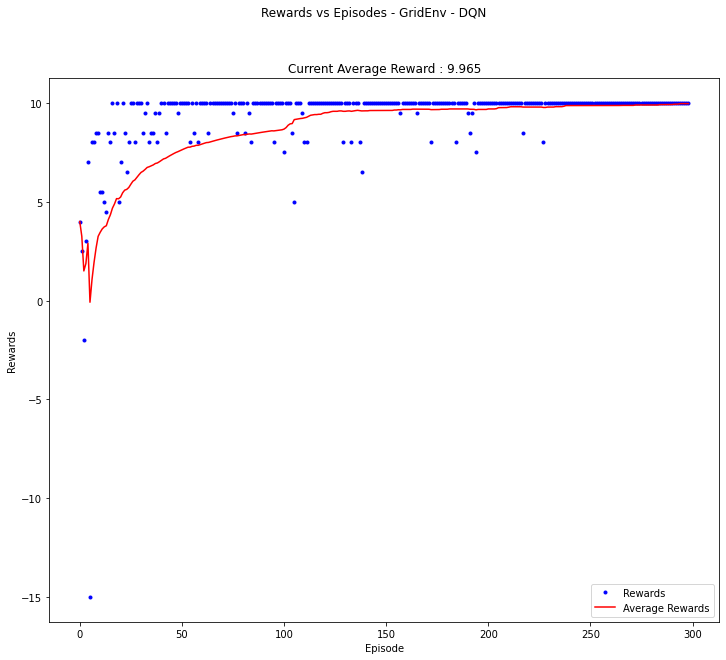

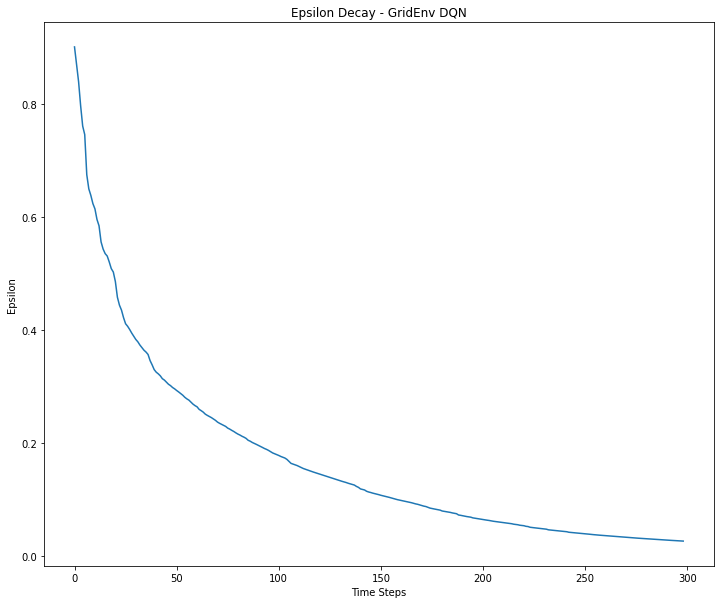

In [4]:
class NeuralNetworkForGridEnv(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 256)
        self.layer_2 = nn.Linear(256, 256)
        self.layer_3 = nn.Linear(256, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)

gridEnv = GridEnvironment(env="Deterministic", max_timesteps=100)
    
dqnGridEnv = DQN(
    envInfo=EnvInfo(
        env=gridEnv,
        observation_space = gridEnv.observation_space.n,
        action_space = gridEnv.action_space.n
    ),
    hyperparams=Hyperparams(
        epsilon=0.9,
        epsilonMin=0.001,
        epsilonDecay=1000,
        memorySize=1000,
        learningRate=1e-4,
        batchSize=128,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=100,
        episodes=300
    ),
    nnModel=NeuralNetworkForGridEnv,
    options = Options(
        resultsPath='./results',
        filePrefix='GridEnv',
        showLiveResults=True,
        logResults = False,
        saveModels = True,
        debug = False
    )
)

dqnGridEnv.train()


## Saving DQN Grid Environment

In [7]:
dqnGridEnv.saveWeights()
dqnGridEnv.saveModels()
dqnGridEnv.saveResults()

<Figure size 864x720 with 0 Axes>

## Evaluation of DQN for Grid Environment

--------------------------------------------------------------------------------

Episode 0                         
Current Reward 10 
--------------------------------------------------------------------------------

Episode 1                         
Current Reward 10 
--------------------------------------------------------------------------------

Episode 2                         
Current Reward 10 
--------------------------------------------------------------------------------

Episode 3                         
Current Reward 10 
--------------------------------------------------------------------------------

Episode 4                         
Current Reward 10 
--------------------------------------------------------------------------------

Episode 5                         
Current Reward 10 
--------------------------------------------------------------------------------

Episode 6                         
Current Reward 10 
------------------------------------------------

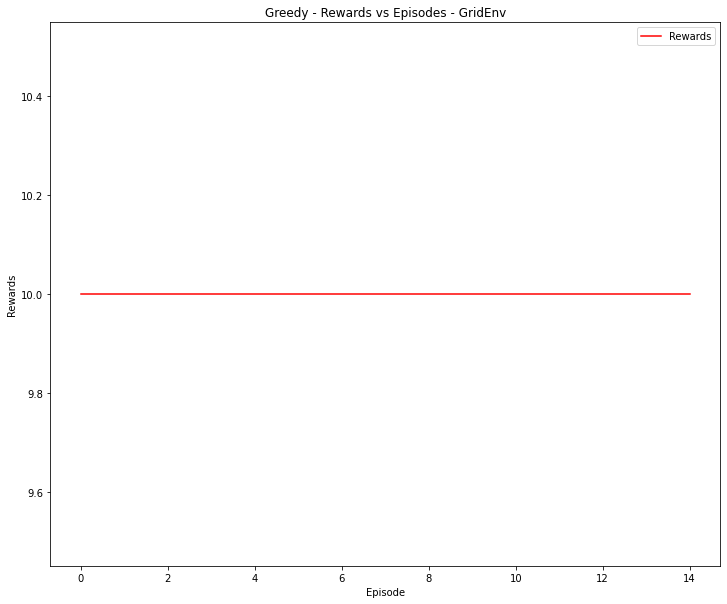

In [8]:
policyModel = torch.load('./results/models/GridEnv_DQN_policy_model.pth')
targetModel = torch.load('./results/models/GridEnv_DQN_target_model.pth')

dqnGridEnv.loadModels(policyModel,targetModel)

dqnGridEnv.greedy(timeSteps = 15)

## DQN - Cartpole

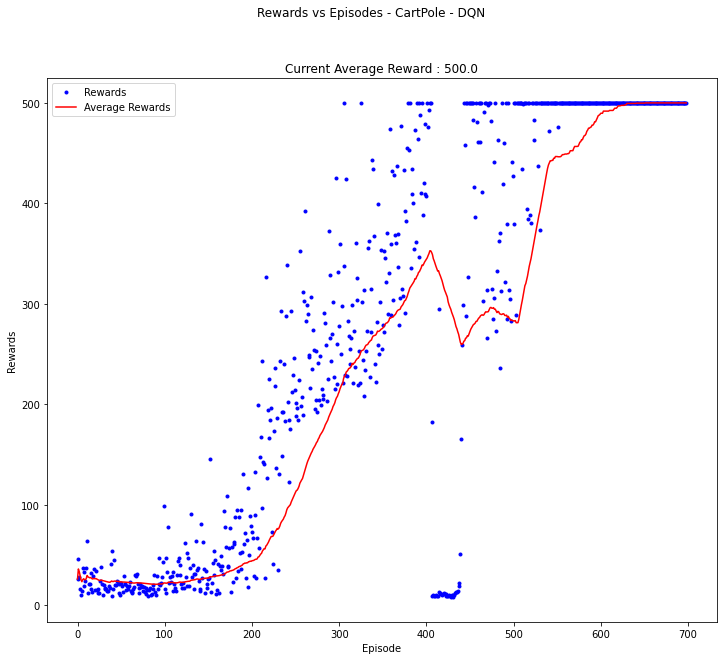

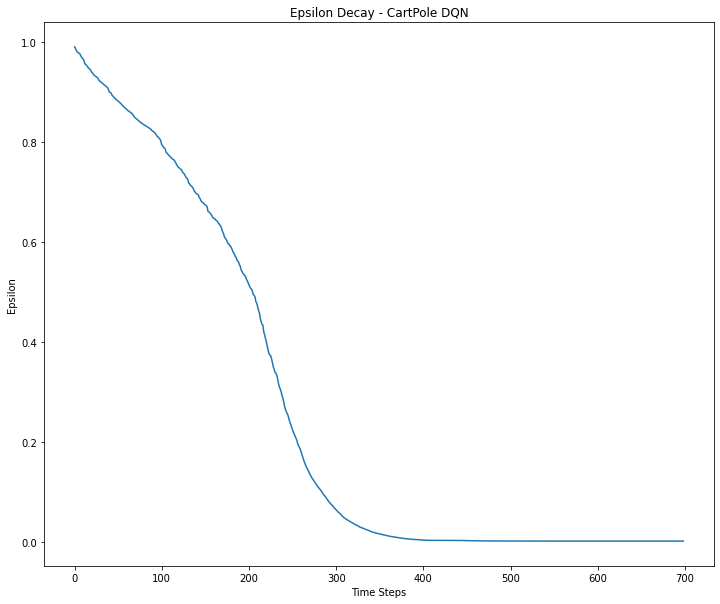

In [7]:
class NeuralNetworkForCartPole(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 128)
        self.layer_2 = nn.Linear(128, 128)
        self.layer_3 = nn.Linear(128, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)
    

CartPoleParameters = (
    EnvInfo(env=gym.make('CartPole-v1')),
    Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=10000,
        memorySize=10000,
        learningRate=1e-4,
        batchSize=128,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=20,
        episodes=700
    ),
    NeuralNetworkForCartPole,
    Options(
        resultsPath='./results',
        filePrefix='CartPole',
        showLiveResults=True,
        logResults = False,
        saveModels = True,
        debug = False
    )
)


dqnCartPole = DQN(*CartPoleParameters)

dqnCartPole.train()



## Saving Results of DQN Cartpole

In [9]:
dqnCartPole.saveWeights()
dqnCartPole.saveModels()
dqnCartPole.saveResults()

<Figure size 864x720 with 0 Axes>

## Evaluation of Results for DQN CartPole

In [ ]:
policyModel = torch.load('./results/models/CartPole_DQN_policy_model.pth')
targetModel = torch.load('./results/models/CartPole_DQN_target_model.pth')

dqnCartPole.loadModels(policyModel,targetModel)
dqnCartPole.greedy(timeSteps=15)

## DQN Acrobot

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym
import pickle
from dqn import Options,DQN,DuelingDQN,DoubleDQN,Hyperparams,EnvInfo
from gridEnvironment import GridEnvironment


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
class NeuralNetworkForAcrobot(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 64)
        self.layer_2 = nn.Linear(64,128)
        self.layer_3 = nn.Linear(128, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)


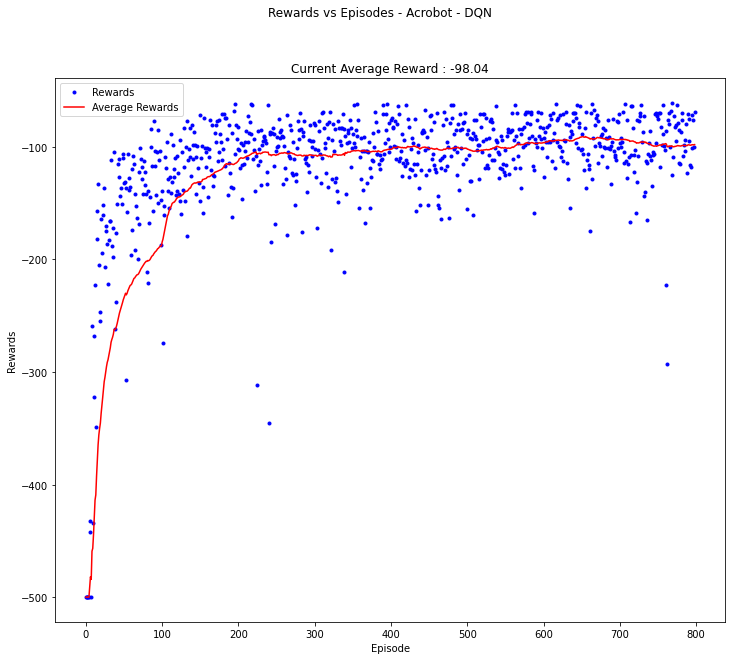

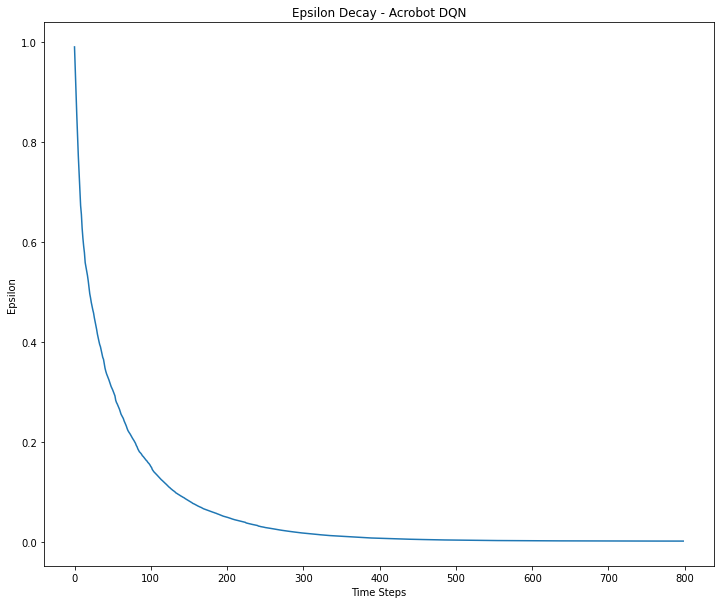

In [36]:
env = gym.make('Acrobot-v1')

dqnAcrobot = DQN(
    envInfo=EnvInfo(env),
    hyperparams=Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=10000,
        memorySize=5000,
        learningRate=1e-3,
        batchSize=256,
        discountFactor=0.999,
        targetNetworkUpdateFrequency=20,
        episodes=800
    ),
    nnModel=NeuralNetworkForAcrobot,
    options = Options(
        resultsPath='./results',
        filePrefix='Acrobot',
        showLiveResults=True,
        logResults = False,
        saveModels = True,
        debug = False
    )
)

dqnAcrobot.train()


## Saving Results of Acrobot

In [45]:
dqnAcrobot.saveResults()
dqnAcrobot.saveModels()
dqnAcrobot.saveWeights()

<Figure size 864x720 with 0 Axes>

## Evaluation of Results DQN Acrobot

--------------------------------------------------------------------------------

Episode 0                         
Current Reward -86.0 
--------------------------------------------------------------------------------

Episode 1                         
Current Reward -95.0 
--------------------------------------------------------------------------------

Episode 2                         
Current Reward -88.0 
--------------------------------------------------------------------------------

Episode 3                         
Current Reward -92.0 
--------------------------------------------------------------------------------

Episode 4                         
Current Reward -83.0 


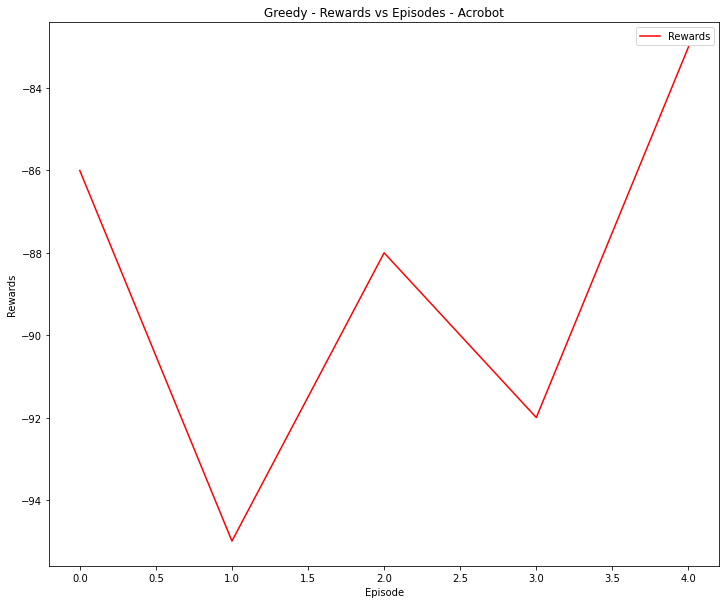

In [44]:
policyModel = torch.load('./results/models/Acrobot_DQN_policy_model.pth')
targetModel = torch.load('./results/models/Acrobot_DQN_target_model.pth')

dqnAcrobot.loadModels(policyModel,targetModel)
dqnAcrobot.greedy(timeSteps = 5)

## Double DQN CartPole

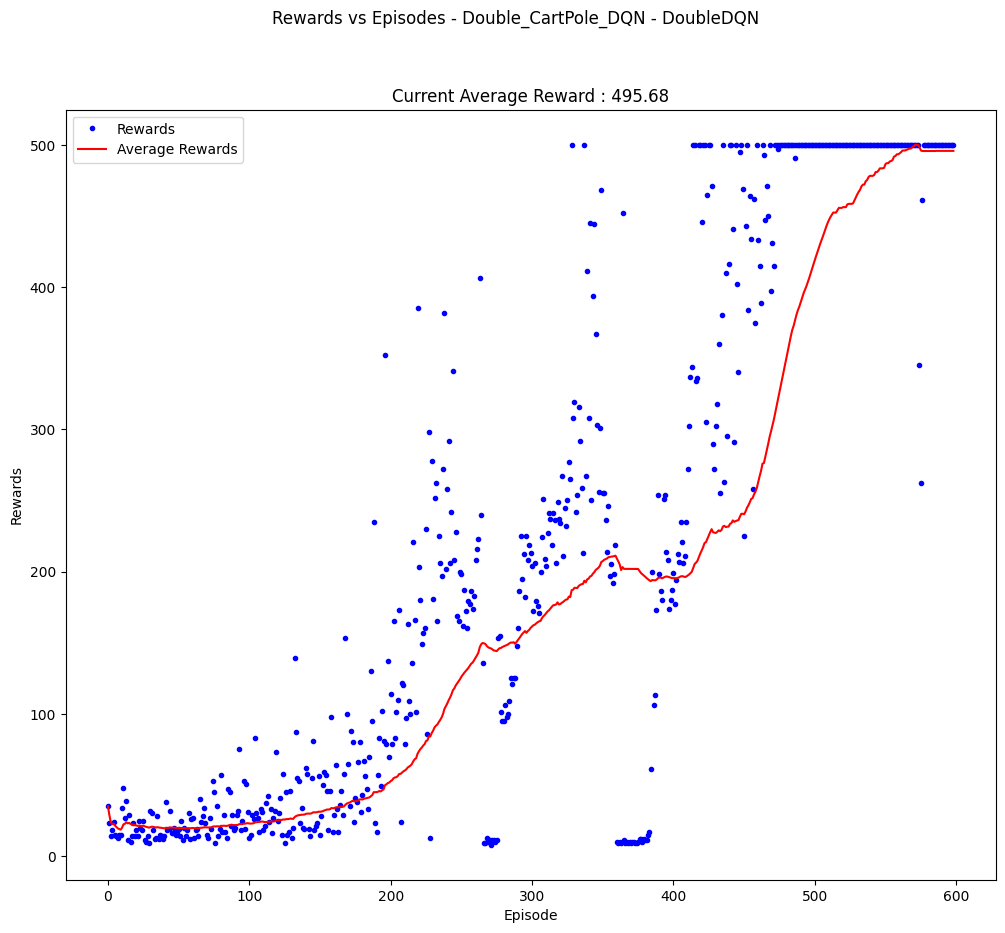

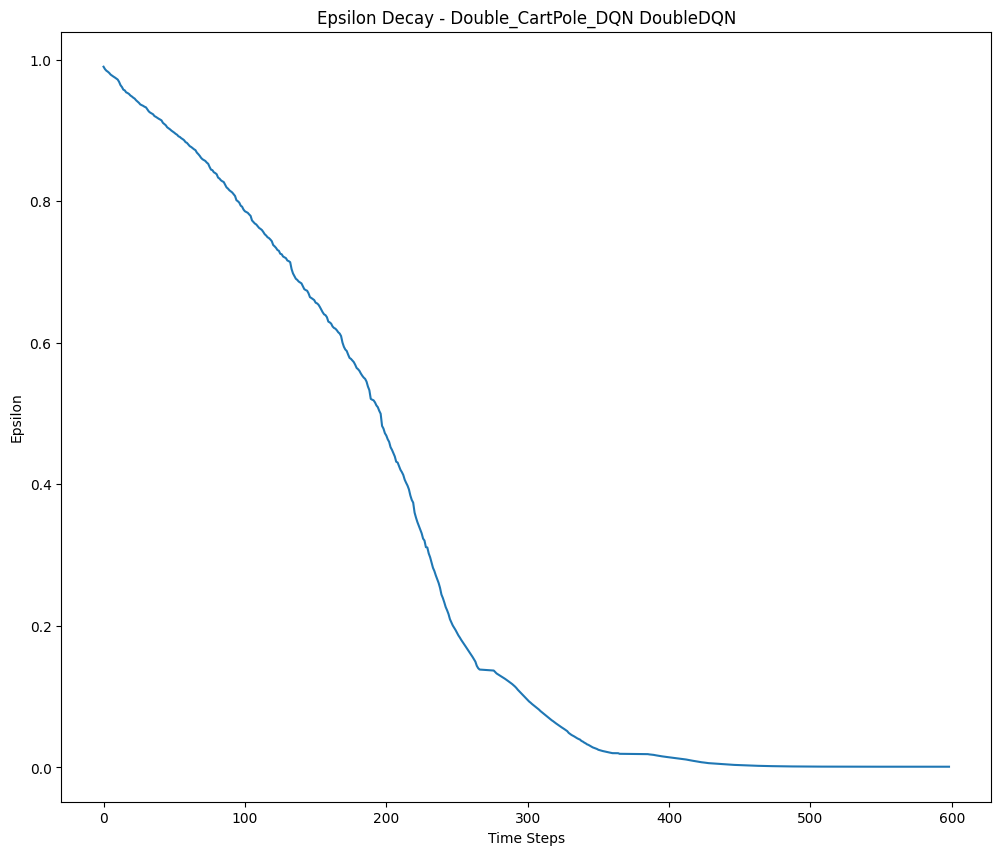

In [14]:
class NeuralNetworkForCartPole(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 128)
        self.layer_2 = nn.Linear(128, 128)
        self.layer_3 = nn.Linear(128, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)

doubleDqnCartPole = DoubleDQN(
    envInfo=EnvInfo(env=gym.make('CartPole-v1')),
    hyperparams=Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=10000,
        memorySize=5000,
        learningRate=1e-4,
        batchSize=128,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=20,
        episodes=600,
        tau=0.003
    ),
    nnModel=NeuralNetworkForCartPole,
    options = Options(
        resultsPath='./results',
        filePrefix='Double_CartPole_DQN',
        showLiveResults=True,
        logResults = False,
        saveModels = True
    )
)

doubleDqnCartPole.train()

## Saving the Results

In [18]:
doubleDqnCartPole.saveWeights()
doubleDqnCartPole.saveModels()
doubleDqnCartPole.saveResults()

<Figure size 1200x1000 with 0 Axes>

--------------------------------------------------------------------------------

Episode 0                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 1                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 2                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 3                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 4                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 5                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 6                         
Current Reward 500.0 
---------------------------

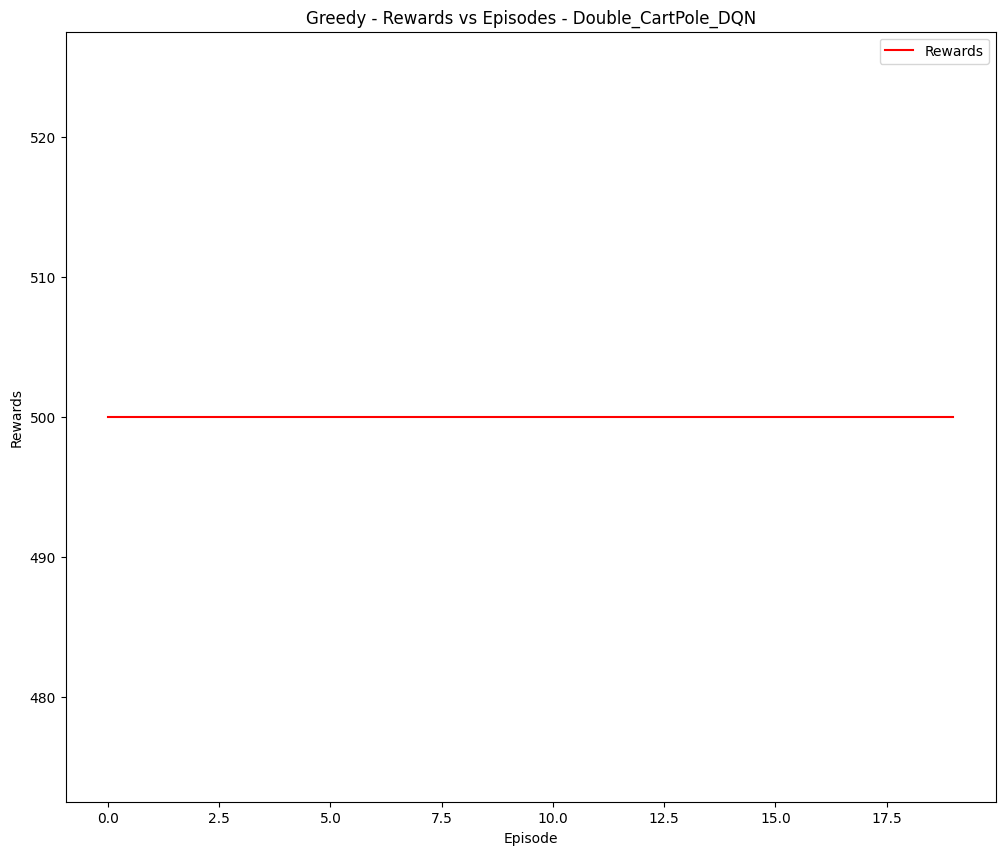

In [15]:
policyModel = torch.load('./results/models/CartPole_DoubleDQN_policy_model.pth')
targetModel = torch.load('./results/models/CartPole_DoubleDQN_target_model.pth')

doubleDqnCartPole.loadModels(policyModel,targetModel)
doubleDqnCartPole.greedy(timeSteps=20)

## Double DQN Acrobot

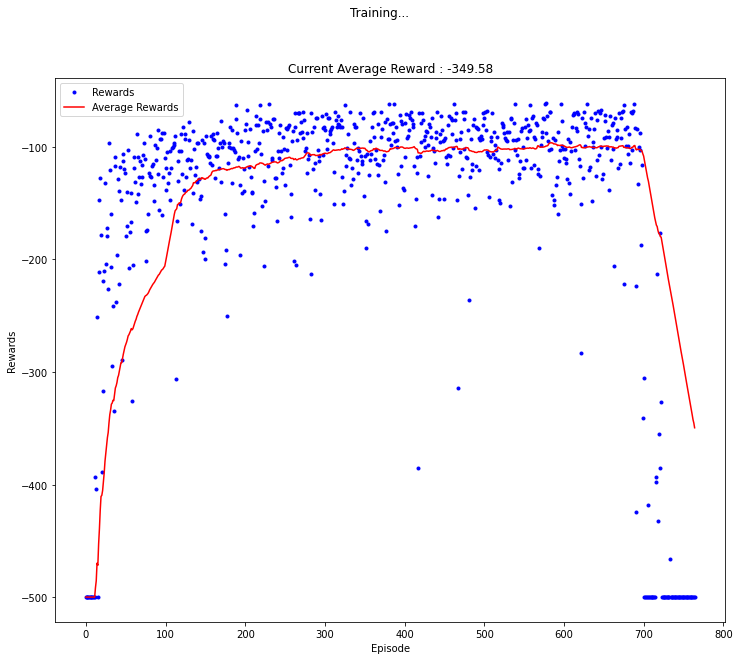

In [ ]:
doubledqnAcrobot = DoubleDQN(
    envInfo=EnvInfo(env),
    hyperparams=Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=10000,
        memorySize=5000,
        learningRate=1e-3,
        batchSize=64,
        discountFactor=0.999,
        targetNetworkUpdateFrequency=20,
        episodes=800,
        tau=0.03
    ),
    nnModel=NeuralNetworkForAcrobot,
    options = Options(
        resultsPath='./results',
        filePrefix='Acrobot',
        showLiveResults=True,
        logResults = False,
        saveModels = True,
        debug = False
    )
)

doubledqnAcrobot.train()


## Saving Results of Double DQN Acrobot

In [19]:
doubledqnAcrobot.saveResults()
doubledqnAcrobot.saveModels()
doubledqnAcrobot.saveWeights()

<Figure size 864x720 with 0 Axes>

## Evaluation of Results Double DQN Acrobot

--------------------------------------------------------------------------------

Episode 0                         
Current Reward -83.0 
--------------------------------------------------------------------------------

Episode 1                         
Current Reward -68.0 
--------------------------------------------------------------------------------

Episode 2                         
Current Reward -68.0 
--------------------------------------------------------------------------------

Episode 3                         
Current Reward -62.0 
--------------------------------------------------------------------------------

Episode 4                         
Current Reward -92.0 


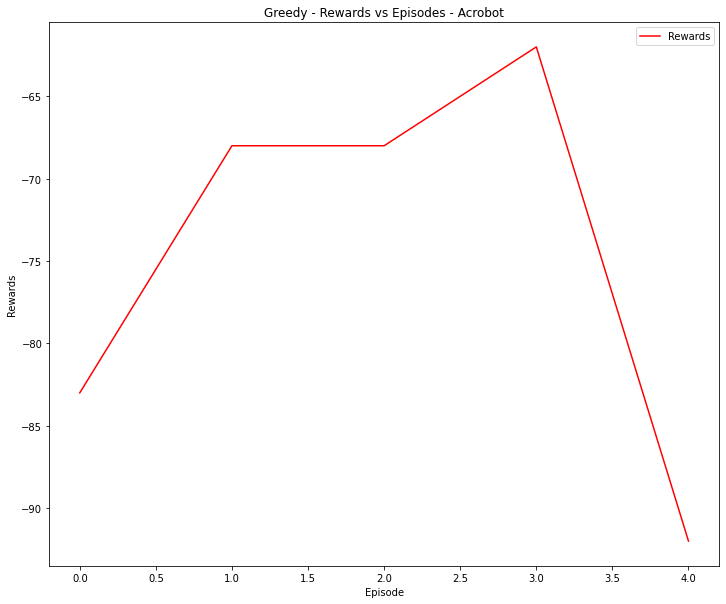

In [21]:
policyModel = torch.load('./results/models/Acrobot_DoubleDQN_policy_model.pth')
targetModel = torch.load('./results/models/Acrobot_DoubleDQN_target_model.pth')

doubledqnAcrobot.loadModels(policyModel,targetModel)
doubledqnAcrobot.greedy(timeSteps = 5)